# Session 7 Exercises

These are the exercises from the Session 7 notes

In [64]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 4. Small particles

### In-class exercises

#### 1. Single particle, no box

a. Create arrays to store the position, velocity and acceleration of a particle in three dimensions for `Nstep` steps (set `Nstep` to 200; your arrays should be `Nstep × 3` in size). Initialise: $\mathbf{r}=(1.0,0.0,0.0)$, $\mathbf{v}=(0.0,1.0,0.1)$ and $\mathbf{a}=(-1.0,0.0,0.0)$. Set the timestep `dt` to 0.1

In [77]:
Nsteps = 200
dt = 0.1  
pos = np.zeros([Nsteps, 3])
vel = np.zeros([Nsteps, 3])
acc = np.zeros([Nsteps, 3])
pos[0] = [1.0,0.0,0.0]
vel[0] = [0.0,1.0,0.1]
acc[0] = [-1.0,0.0,0.0]

b. Now write a simple for loop to implement the velocity Verlet algorithm given above, running from step 1 and covering Nstep steps. At each step, calculate the time, and use $\mathbf{a}(t)=(-\cos(t),-\sin(t),0)$ and from this update position and velocity.

In [78]:
t=0
for timestep in range(0,Nsteps-1):
    t+=dt
    acc[timestep+1] = [-np.cos(t+dt),-np.sin(t+dt),0]
    pos[timestep+1] = pos[timestep] + vel[timestep]*dt + dt**2 * acc[timestep]/2
    vel[timestep+1] = vel[timestep] + dt*(acc[timestep] + acc[timestep+1]/2)

print()

c. Using `fig = plt.figure` and `ax = fig.add_subplot(111,projection=’3d’)`, plot the trajectory of the particle in 3 dimensions with `ax.plot(x,y,z)` where `x`, `y`, `z` are given by components of `r` (you might use `r[:,0]` etc).

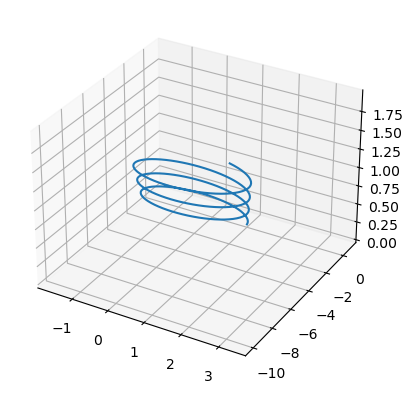

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(pos[:,0],pos[:,1],pos[:,2])

#### 2. Single particle, open boundaries.

a. Define a side length, $L$, for a box (say 10 units), and set up position and velocity arrays as before (we will assume that the acceleration is zero). Choose a random starting point  for the particle in the box (create a random number generator with `rng = np.random.default_rng()` and then use `rng.random(3)`, which will return a length 3 array with numbers drawn at random from a uniform distribution between 0 and 1, and scale by box length) and random initial velocity (this time do not scale `rng.random`).

In [107]:
L = 10

rng = np.random.default_rng()

pos2 = np.zeros([Nsteps, 3])*L
vel2 = np.zeros([Nsteps, 3])
acc2 = np.zeros([Nsteps, 3])

pos2[0] = rng.random(3)
vel2[0] = rng.random(3)

print(pos2[0])



[0.39671835 0.61800442 0.18272124]


b. Use a simple `for` loop to evolve forward in time for 200 steps using velocity Verlet again, and plot the path of the particle using `ax.scatter` in three dimensions.

(0.0, 10.0)

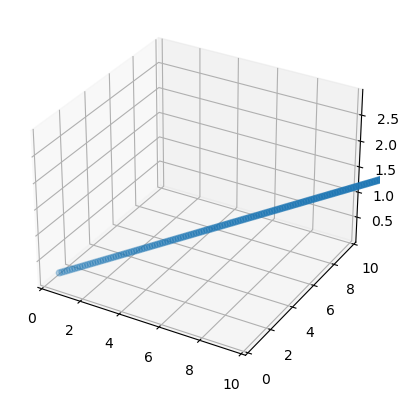

In [108]:
t=0
for timestep in range(0,Nsteps-1):
    t+=dt
    acc2[timestep+1] = [0,0,0]
    pos2[timestep+1] = pos2[timestep] + vel2[timestep]*dt + dt**2* acc2[timestep]/2
    vel2[timestep+1] = vel2[timestep] + dt*(acc2[timestep] + acc2[timestep+1]/2)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(pos2[:,0],pos2[:,1],pos2[:,2])
ax.set_xlim((0,L))
ax.set_ylim((0,L))
ax.set_ylim((0,L))


c. Where is the particle relative to the edges of the box at the end of the simulation?

#### 3. Single particle, periodic boundaries.

a.	Set up a box as in the previous part, along with arrays for position and velocity, and choose a random starting point and velocity (you can continue to use `rng.random()` for your random number generation).

In [113]:
L = 10

pos3 = np.zeros([Nsteps, 3])*L
vel3 = np.zeros([Nsteps, 3])
acc3 = np.zeros([Nsteps, 3])

pos3[0] = rng.random(3)
vel3[0] = rng.random(3)

print(pos3[0])

[0.88773442 0.93880032 0.11797317]


b. Write another `for` loop as in Q2 above but this time implement periodic boundary conditions: for each component of position, you need to ensure *after updating the position* that if `r[i]<0` or `r[i]>L` then that component is wrapped back into the box (you could write a function to do it, or just apply the modulo operator `%` giving `r%boxlen` or something similar).

(0.0, 10.0)

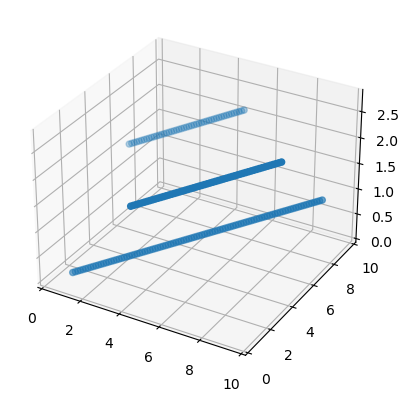

In [116]:
t=0
for timestep in range(0,Nsteps-1):
    t+=dt
    acc3[timestep+1] = [0,0,0]
    pos3[timestep+1] = (pos3[timestep] + vel2[timestep]*dt + dt**2* acc2[timestep]/2)%L
    vel3[timestep+1] = vel2[timestep] + dt*(acc2[timestep] + acc2[timestep+1]/2)


fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(pos3[:,0],pos3[:,1],pos3[:,2])
ax.set_xlim((0,L))
ax.set_ylim((0,L))
ax.set_ylim((0,L))


c.	Plot the trajectory again, and check that the kinetic energy is conserved (you can use something like `np.sum(v*v,axis=1)` on the velocity array, and plot it against time).

### Further work

1. For the single particle in Q1 above, experiment with other plots: create two 3D subplots, and plot the particle trajectory in the first with `ax.scatter(x,y,z)`. In the second, use array slices (`x[::n]` will extract every $n^{th}$ point in an array) and plot the velocity vectors using `ax.quiver(x,y,z,vx,vy,vz)`. You might want to plot the trajectory using `ax.plot(x,y,z)` as well.

2. Calculate the kinetic energy (you can use something like `np.sum(v*v,axis=1)` if you have used the array structure suggested above—this will give an array of the kinetic energy at each step) and plot it. How well is it conserved? If you have time, experiment with the effect of timestep on conservation.

3. Write a function to apply hard-wall boundary conditions: $r_i>L\Rightarrow r_i=2L-r_i,v_i=-v_i$ and $r_i<0\Rightarrow r_i=-r_i,v_i=-v_i$. Run the same calculation that you did for Q3 of the in-class exercises, but apply your hard-wall function after updating the position. Plot the path of the particle in three dimensions, and check that the conditions are applied correctly. (If you use `%matplotlib notebook` then the 3D plot will be interactive, and you can change the viewpoint with your mouse.) You could also check that the kinetic energy is conserved again.

## 5. The Lennard-Jones potential

### In-class

1. Write a function to calculate and return the Lennard-Jones potential energy for a set of $N_{Part}$ particles; you should pass the positions (in three dimensions), the number of particles, `NPart`, and the constants `sigma` and `epsilon` as parameters. You should assume that the position array is of dimension `NPart × 3`. You will need a double `for` loop, with the first index `i` running from `0` to `NPart-1` and the second index `j` running from `i+1` to `NPart`. Calculate $\mathbf{r}_{ij}=\mathbf{r}_{j}-\mathbf{r}_{i}$ and then evaluate $r_{ij}^{2}$ with `np.sum(rij*rij)`.

In [ ]:
def len_jones(NPart, sigma, epsilon):
    ...

2. Write a function to evaluate and return the Lennard-Jones forces on a set of $N_{Part}$ particles, following the same approach as in Q1. You can also calculate the energy in this function if you want. (Note that the loops will be the same, but now when you calculate a force between particles $i$ and $j$ this gives both $\mathbf{F}_{i} (\mathbf{r}_{ij})$ and $-\mathbf{F}_{j} (\mathbf{r}_{ij})$.)

3. Initialise variables to represent $\epsilon$,$\sigma$,$k_{B}$,$m$ using the values for neon given above. Set the number of steps, `Nstep`, to 500 initially.

4. Now we are going to create cubic lattice by repeating the basic building block in all three directions. The building block is a cube with one particle in the bottom left corner. Set a variable `Ncell` to represent the number of cubes along each axis (I suggest 2 or 3 to start) and set `NPart=Ncell**3`. Create arrays to hold position and velocity for `NPart` particles and `Nstep` timesteps (they should have dimension `Nstep × Npart × 3` for ease of reference). Set the box length to $L=2^{1/6} \sigma N_{cell}$. Loop over `Ncell` in $x$, $y$ and $z$ with variables `i`, `j` and `k`, and set the position of each atom to `L x (i,j,k)/Ncell`, for instance:

`part_no = 0
for i in range(Ncell):
    for j in range(Ncell):
        for k in range(Ncell):
            pos[part_no] = (boxlen/Ncell) * np.array([i, j, k])
            part_no += 1`

Plot your atoms in 3D to check.

5. We will initialise the velocities: use `rng.standard_normal(size=(Npart, 3))` to generate a normal distribution, and then rescale them so that the temperature is correct (you will have to rearrange the equation $mC^{2} \sum_{i} v_{i}^{2} =3N_{part} k_{B} T$ to find the rescaling factor C; use `np.sum(v*v)` to evaluate the sum in this case). Set up arrays to store the potential and kinetic energies, and the temperature, for all steps. Calculate the potential energy and forces for the initial set of atomic positions using your functions from Q1 and Q2. Calculate the accelerations for this time step (`acc_this`) from the forces. Store the potential energy for step zero, and calculate the total kinetic energy and temperature for the initial velocities and store these.

6. Now use the velocity Verlet algorithm to propagate your system. At each step you will need to evaluate `acc_next` *after* you calculate the updated positions, and use `acc_this` and `acc_next` to calculate the new velocities. Store the potential energy, kinetic energy and temperature at each step. Plot the two energies and their sum against time: the total should be conserved. (You may find it useful to normalise the energies by dividing by $N_{part} \epsilon$.)

### Further work

1. Plot snapshots of the atomic configurations at different times to get a sense of how the atoms move.

2. Plot the complete trajectory of one or two atoms.

3. Plot a histogram of the square of the particle speeds for the final step (use `np.sqrt(np.sum(v*v,axis=1))` or something similar) and, on the same graph, plot the expected distribution given the temperature at the final step.

## 6. Inverse quadratic interactions

### In-class

1. Write a function to evaluate the electrostatic force on a body with charge `q1` at a position `pos` from another body with charge `q2` at the origin.  You can define the appropriate constant ($1/4\pi\epsilon_0$) in the function or externally.  Here and later in the exercise, you might use the module constants from Scipy (`from scipy import constants`) and use `constants.epsilon_0`, `constants.e` (elementary charge) and `constants.m_p` (mass of the proton).

In [131]:
from scipy.constants import epsilon_0, e, m_p
def electrostatic(q1, pos, q2):
    return q1*q2/(4*np.pi*epsilon_0*np.linalg.norm(pos))

2.	Set up the quantities needed for Rutherford scattering: the two bodies are an alpha particle (He nucleus, with Z=2) and a gold nucleus (Au with Z=79), so you can set up `q1`, `q2` and `m1` (you do not need `m2`: we will consider the Au nucleus to be fixed).  The Au nucleus is situated at the origin, while the alpha particle should start at some distance along the x-axis (I used 1pm) and displaced along $y$ by a quantity $b$ (initially set this to 40fm).  The initial velocity should be purely along x towards the origin, with a magnitude of $10^7$ m/s.  Use a timestep of $10^{-23}$s (0.01 zeptoseconds if you like, or 10 yoctoseconds) and calculate the number of steps required from the time needed to travel twice the initial displacement (2pm if you use my suggestion above).  Set up arrays to store the position and velocity of the alpha particle for all timesteps, and set the values at the initial timestep.

In [132]:
electrostatic(79*e, [1e-15, 0, 0], 2*e)

vel4 = np.zeros()



3.645182532699942e-11

3.	Now propagate the system using a velocity Verlet approach, and plot the resulting trajectory.  Calculate the total energy for every step and plot it (note that for a 2D array such as `vel[Nsteps,Ndim)]` representing the velocity vector at each timestep, you can calculate the magnitude of the velocity at all timesteps as an array using the command `np.linalg.norm(vel,axis=1)`; you can then find the kinetic energy at all timesteps by using the square of this array).  Remember that the potential energy will be $q_1q_2/4\pi\epsilon_0r$ when the charges are a distance $r$ apart; you can use a similar approach to find the distance at all timesteps as you used for velocity.

### Further work

1.	You should experiment with the effect of changing the initial velocity and the displacement `b` along $y$ (it will change the angle of deflection primarily).  You can find the angle of deflection, $\phi$, from the initial and final velocity vectors.  It can be shown that $\tan(\phi/2) = q_1q_2/(4\pi\epsilon_0m_1v^2b)$ where $v$ is the initial velocity at infinite separation (as we are not starting at infinite separation, this will not correspond quite to what you see, but will be close; you can correct this by finding the total energy, and finding the velocity that corresponds to this energy).  Try plotting several trajectories, and examine the effects of the different parameters, plotting all trajectories on the same graph.  I found it instructive to add asymptotes for the motion based on the expected angle of deflection.

## 7. Coarse graining

$\mathbf{F}(\mathbf{r})=\mathbf{r}D\left(\frac{2}{r^4} - \frac{4}{r^6}\right)$

### In-class

1. Write a function to calculate the interaction force above. You should take $D=10^4$.

2. For a chain with 20 links, create arrays to store the position and velocity for `Nstep` time steps (set this to 3000). Set a timestep of `1e-3`s, and space the links in the chain (the particles) $\sqrt{2}$m apart, and give the links a mass of 1kg each. Set the velocities to zero, and calculate the initial acceleration from your interaction force function above and the acceleration due to gravity ($9.8ms^{-2}$). Ensure that the acceleration and velocity for the first and last links are zero (these are fixed).

3.	Propagate your chain in time using the velocity Verlet algorithm, and plot its displacements every 200 or 250 steps. Does the behaviour seem reasonable?

### Further work

1. Introduce a damping factor into your integration scheme, testing the effect of different values between 0.9 and 1.0.